# Evaluate Model

In [10]:
import keras

/Users/nathaniel/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/nathaniel/miniconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [11]:
model = keras.models.load_model('epochs_200_datav2_densenet_regularize_0.01_2018-09-08_20-32-08_weights.chkpt.hdf5')

In [12]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
main_input (InputLayer)         (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
densenet121 (Model)             (None, 7, 7, 1024)   7037504     main_input[0][0]                 
__________________________________________________________________________________________________
flatten_1 (Flatten)             (None, 50176)        0           densenet121[1][0]                
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 50176)        0           flatten_1[0][0]                  
__________________________________________________________________________________________________
batch_norm

In [13]:
import cv2
from matplotlib import pyplot as plt

In [14]:
img = cv2.imread('IMG_3185.jpeg')
img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)

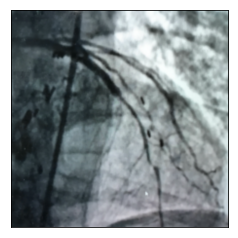

In [15]:
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [22]:
import numpy as np
img_np = np.array(img)
img_np = img_np/255

img_np = np.expand_dims(img_np, axis=0)

In [27]:
prediction = model.predict([img_np], verbose=1)

1/1 [==============================] - 0s 307ms/step


In [30]:
print(np.argmax(prediction[1]))
print(np.max(prediction[1]))

1
0.99977475


In [29]:
print(prediction[0])

[[0.99809676]]
